# Módulo 10 atividade 1

Uma instituição financeira quer conhecer melhor o perfil de renda de seus novos clientes para diversos fins, por exemplo, melhor dimensionar o limite de cartões de crédito dos novos clientes, sem necessariamente solicitar olerites ou documentações que impactem na experiência do seu cliente.

Para isto, conduziu um estudo com alguns clientes, comprovando suas rendas através de olerites e outros documentos, e pretende construir um modelo preditivo para esta renda com base em algumas variáveis que já possui em seu banco de dados.

As variáveis são intuitivas - note que há uma variável 'index' que é um identificador do cliente e que em geral o ```read_csv``` do pandas coloca também uma variável sequencial.

Estes dados estão no arquivo ```previsao_de_renda.csv```. Carregue-o em um *dataframe*.

1) Avalie a estrutura de correlação das variáveis quantitativas através de um gráfico de "matriz de dispersão" e através da avaliação gráfica da matriz de correlações. Veja se você identifica algum padrão interessante ou que te faça sentido.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [8]:
df = pd.read_csv('Profissão- Cientista de Dados_M10_support material.csv')
df.head()

,Unnamed: 0,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
0,0,2015-01-01,8682,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,False,3369.24
1,1,2015-01-01,12830,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,False,6096.14
2,2,2015-01-01,2885,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,False,5658.98
3,3,2015-01-01,16168,F,True,False,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,False,7246.69
4,4,2015-01-01,12438,M,False,False,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,False,4017.37


In [9]:
df.select_dtypes(include='number').head()

,Unnamed: 0,index,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,renda
0,0,8682,1,36,3.575342,3.0,3369.24
1,1,12830,0,42,0.860274,2.0,6096.14
2,2,2885,2,31,8.065753,4.0,5658.98
3,3,16168,0,50,1.208219,2.0,7246.69
4,4,12438,0,52,13.873973,2.0,4017.37


In [10]:
df1=df[['tipo_renda','renda','qtd_filhos','idade','tempo_emprego','qt_pessoas_residencia']]
df1.corr()

,renda,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia
renda,1.000000,0.009567,0.042570,0.394235,0.020977
qtd_filhos,0.009567,1.000000,-0.364303,-0.074250,0.896488
idade,0.042570,-0.364303,1.000000,0.323934,-0.338805
tempo_emprego,0.394235,-0.074250,0.323934,1.000000,-0.065748
qt_pessoas_residencia,0.020977,0.896488,-0.338805,-0.065748,1.000000


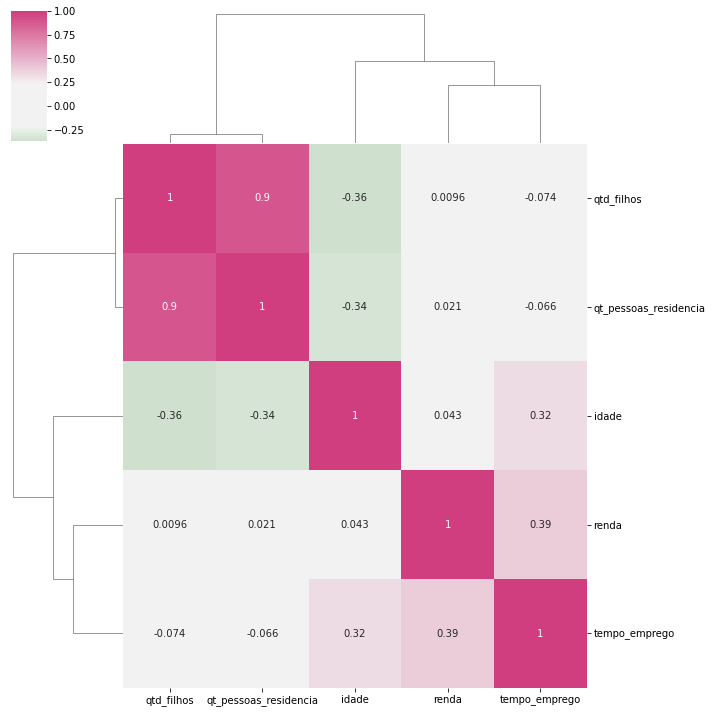

In [11]:
renda_cmap = sns.diverging_palette(h_neg=125,h_pos=350,as_cmap=True,sep=60,center='light')
sns.clustermap(df1.corr(),figsize=(10,10),center=0,annot=True,cmap=renda_cmap)

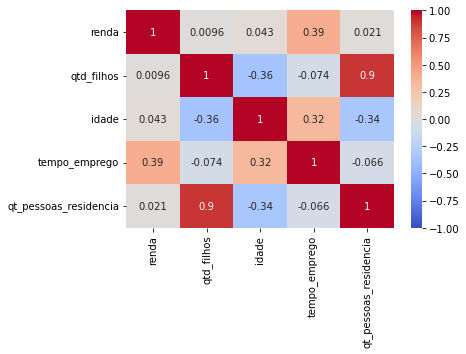

In [12]:
_ = sns.heatmap(df1.corr(),annot=True,vmin=-1,vmax=1,cmap='coolwarm')

,tempo_emprego,renda
tempo_emprego,1.000000,0.394235
renda,0.394235,1.000000


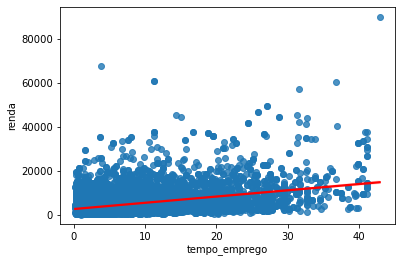

In [13]:
df1 = df[['tempo_emprego','renda']]
_ = sns.regplot(x = 'tempo_emprego', y ='renda', data = df1, line_kws = {'color': 'red'})
df1.corr()

,tempo_emprego,idade
tempo_emprego,1.000000,0.323934
idade,0.323934,1.000000


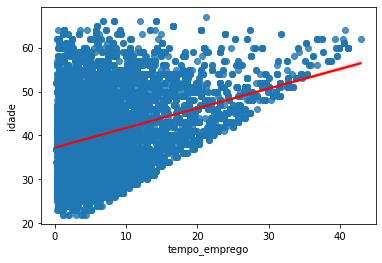

In [14]:
df1 = df[['tempo_emprego','idade']]
_ = sns.regplot(x = 'tempo_emprego', y ='idade', data = df1, line_kws = {'color': 'red'})
df1.corr()

2) Avalie um gráfico de dispersão (*scatterplot*) específico para as duas variáveis mais correlacionadas com *renda*.

<AxesSubplot:>

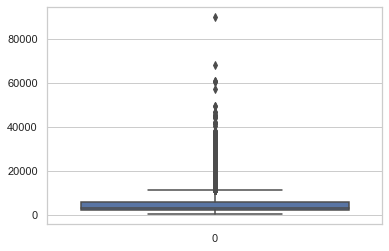

In [15]:
df1 = df[['tempo_emprego','renda']]
sns.set(style="whitegrid", color_codes=True)
sns.boxplot(data=df1['renda'])

<AxesSubplot:>

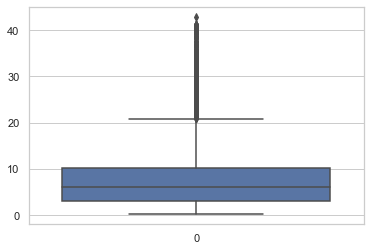

In [16]:
sns.boxplot(data=df1['tempo_emprego'])

,tempo_emprego,renda
tempo_emprego,1.000000,0.394235
renda,0.394235,1.000000


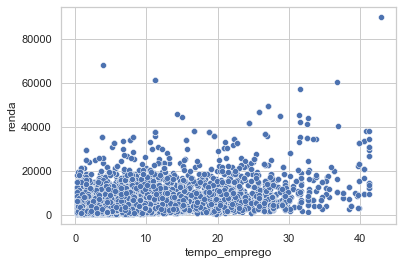

In [17]:
sns.scatterplot(x = 'tempo_emprego', y ='renda', data = df1)
df1.corr()

3) Na su aopinião, há outliers na variável renda?

Text(0.5, 1.0, 'Renda com Outliers')

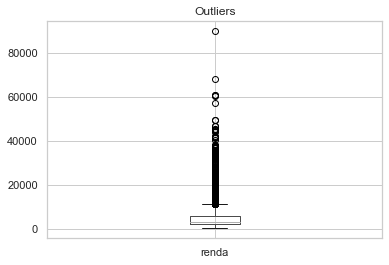

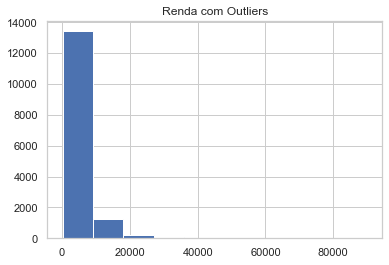

In [19]:
df1.boxplot(['renda'])
plt.title('Outliers')
df1.hist(['renda'])
plt.title('Renda com Outliers')

In [20]:
valor = df1['renda']
Q1 = valor.quantile(.25)
Q3 = valor.quantile(.75)
IIQ = Q3 - Q1
limite_inferior = Q1 - 1.5 * IIQ
limite_superior = Q3 + 1.5 * IIQ

Text(0.5, 1.0, 'Renda sem Outliers')

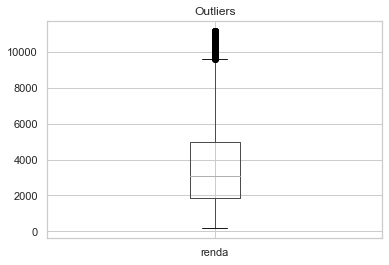

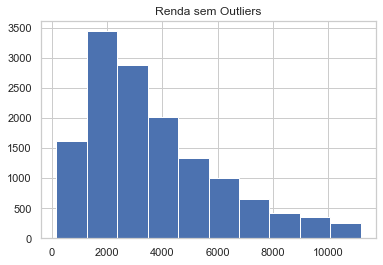

In [21]:
selecao = (valor>= limite_inferior) & (valor <= limite_superior)
df1_new = df1[selecao]
df1_new.boxplot(['renda'])
plt.title('Outliers')
df1_new.hist(['renda'])
plt.title('Renda sem Outliers')

Text(0.5, 1.0, 'Com Outliers')

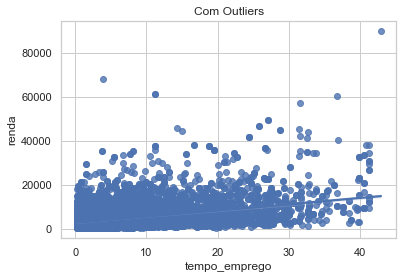

In [22]:
_ = sns.regplot(x='tempo_emprego', y='renda', data = df1)
plt.title('Com Outliers')

Text(0.5, 1.0, 'Sem Outliers')

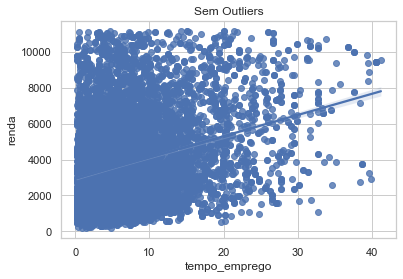

In [23]:
_ = sns.regplot(x='tempo_emprego', y='renda', data = df1_new)
plt.title('Sem Outliers')

In [ ]:
#Sim, é possível observar a presença de outliers nas análises dos dados. Entretanto, ainda não é possível afirmar que isto seja
#um erro do banco. 

4) Calcule o logaritmo da variável renda e repita a sequência de análise

In [24]:
df4_log=df1[['tempo_emprego','renda']].copy()
df4_log.rename(columns={'tempo_emprego': 'x','renda': 'y'}, inplace=True)
df4_log['log_y'] = np.log(df4_log['y'])
df4_log.corr()

,x,y,log_y
x,1.000000,0.394235,0.379556
y,0.394235,1.000000,0.835734
log_y,0.379556,0.835734,1.000000


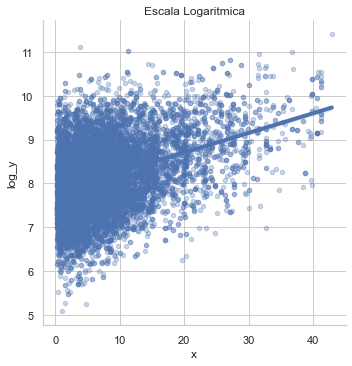

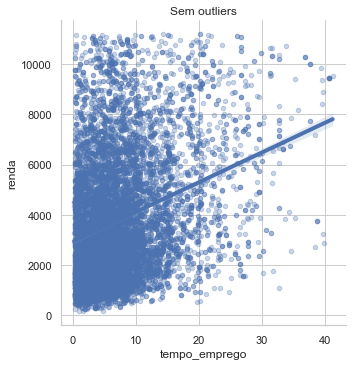

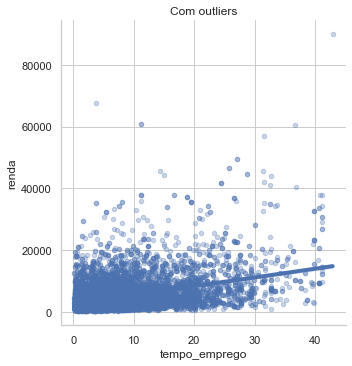

In [25]:
%matplotlib inline

sns.lmplot(x='x',
                  y='log_y', 
                 data=df4_log, 
                 scatter_kws={'s': 20, 'alpha': 0.3},
                 line_kws={'lw': 4});
plt.title('Escala Logaritmica')

sns.lmplot(x='tempo_emprego',
                  y='renda', 
                 data=df1_new, 
                 scatter_kws={'s': 20, 'alpha': 0.3},
                 line_kws={'lw': 4})
plt.title('Sem outliers')

sns.lmplot(x='tempo_emprego',
                  y='renda', 
                 data=df1, 
                 scatter_kws={'s': 20, 'alpha': 0.3},
                 line_kws={'lw': 4})
plt.title('Com outliers');

5) A aplicação do LOG você acha que melhorou ou piorou a análise?

In [ ]:
# A utilização da escala logaritma melhorou a análise de dados, pois tende a diminuir discrepâncias extremas entre valores muito
#altos e muito baixos. O que retorna um gráfico mais limpo, o que é essencial para uma boa análise de dados. 